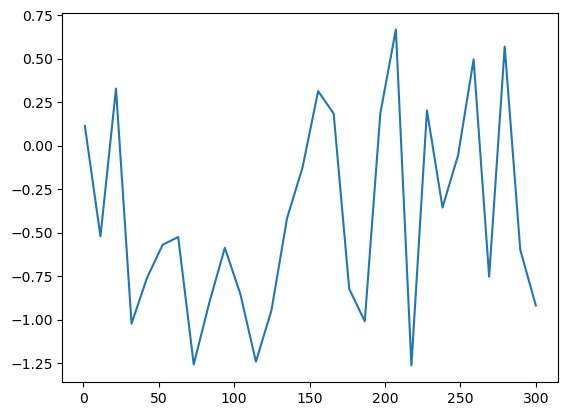

In [45]:
import numpy as np
import matplotlib.pyplot as plt

size = 30
x = np.linspace(1,size*10,size)
y = np.random.uniform(-1,1,size)-.3

plt.plot(x,y)
plt.show()

In [46]:
from scipy.interpolate import make_interp_spline, PPoly

integ = 0
for i in range(size-1):
    if y[i]>0 and y[i+1]<0:
        spline = make_interp_spline([x[i],x[i+1]], [y[i],y[i+1]], k=1) # Create a cubic spline from the data
        curve  = PPoly.from_spline(spline)     # Create a piecewise polynomial object; in essence, y = curve(x)
        x0 = curve.solve(y=0)
        integ += y[i]*(x0-x[i])/2 - abs(y[i+1])*(x[i+1]-x0)/2

    if y[i]<0 and y[i+1]>0:
        spline = make_interp_spline([x[i],x[i+1]], [y[i],y[i+1]], k=1) # Create a cubic spline from the data
        curve  = PPoly.from_spline(spline)     # Create a piecewise polynomial object; in essence, y = curve(x)
        x0 = curve.solve(y=0)
        integ += y[i+1]*(x[i+1]-x0)/2 - abs(y[i])*(x0-x[i])/2

    if y[i]>0 and y[i+1]>0:
        integ += y[i]*(x[i+1]-x[i])+(y[i+1]-y[i])*(x[i+1]-x[i])/2

    if y[i]<0 and y[i+1]<0:
        integ -= abs(y[i])*(x[i+1]-x[i])+(abs(y[i+1])-abs(y[i]))*(x[i+1]-x[i])/2

print(integ)

[-124.0828856]


In [7]:
np.mean(y)

0.0028638765013041232

[1.375]


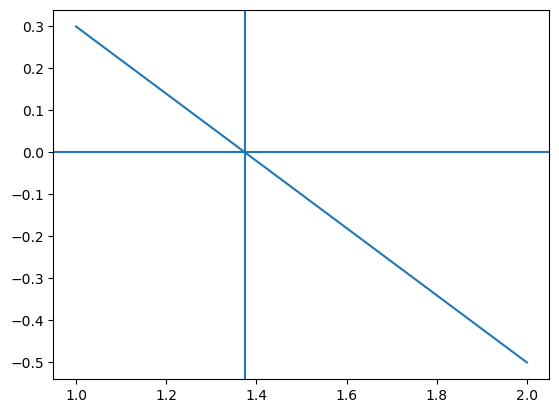

In [15]:
import numpy as np
from scipy.interpolate import make_interp_spline, PPoly
import matplotlib.pyplot as plt

x=[1,2]
y=[.3,-.5]

spline = make_interp_spline(x, y, k=1) # Create a cubic spline from the data
curve  = PPoly.from_spline(spline)     # Create a piecewise polynomial object; in essence, y = curve(x)
x0 = curve.solve(y=0)
print(x0)                # Solve for y = 0


plt.plot(x,y)
plt.axvline(x0)
plt.axhline(0)
plt.show()
